In [1]:
import sys
sys.path.append('..')
import forensic_similarity as forsim #forensic similarity tool
from utils.blockimage import tile_image #function to tile image into blocks

import matplotlib.pyplot as plt
import numpy as np


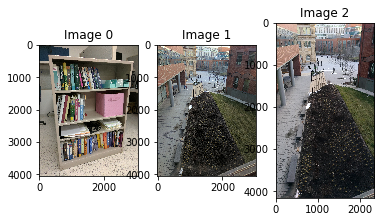

In [2]:
#LOAD IMAGES
I0 = plt.imread('./images/0_google_pixel_1.jpg')
I1 = plt.imread('./images/1_google_pixel_1.jpg')
I2 = plt.imread('./images/2_asus_zenphone_laser.jpg')

#SHOW IMAGES
fig,ax = plt.subplots(1,3)
ax[0].imshow(I0); ax[1].imshow(I1); ax[2].imshow(I2)
ax[0].set_title('Image 0'); ax[1].set_title('Image 1'); ax[2].set_title('Image 2')
plt.show()

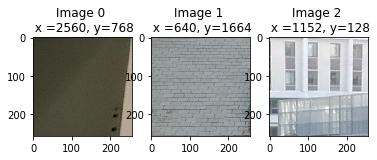

In [3]:
#Get tiles/patches from images
patch_size = 256
overlap = 128

#tiles and xy coordinates of each tile for image 0
T0,xy0 = tile_image(I0,width=patch_size,height=patch_size, 
                x_overlap=overlap,y_overlap=overlap)

#tiles and xy coordinates of each tile for image 1
T1,xy1 = tile_image(I1,width=patch_size,height=patch_size,
                x_overlap=overlap,y_overlap=overlap)

#tiles and xy coordinates of each tile for image 2
T2,xy2 = tile_image(I2,width=patch_size,height=patch_size,
                x_overlap=overlap,y_overlap=overlap)

#SHOW RANDOM TILES
ind0 = np.random.randint(0,len(T0)) #select random index
ind1 = np.random.randint(0,len(T1))
ind2 = np.random.randint(0,len(T2))

fig,ax = plt.subplots(1,3) #show randomly selected tiles
ax[0].imshow(T0[ind0])
ax[1].imshow(T1[ind1])
ax[2].imshow(T2[ind2])

ax[0].set_title('Image 0 \n x ={}, y={}'.format(xy0[ind0][0],xy0[ind0][1]))
ax[1].set_title('Image 1 \n x ={}, y={}'.format(xy1[ind1][0],xy1[ind1][1]))
ax[2].set_title('Image 2 \n x ={}, y={}'.format(xy2[ind2][0],xy2[ind2][1]))

plt.show()


In [4]:
#Randomly select N tiles
N = 1000

inds0 = np.random.randint(0,len(T0),size=N) #select random indices
inds1 = np.random.randint(0,len(T1),size=N) 
inds2 = np.random.randint(0,len(T2),size=N)

X0 = T0[inds0] #vector of randomly selected image tiles
X1 = T1[inds1] #vector of randomly selected image tiles
X2 = T2[inds2] #vector of randomly selected image tiles


In [5]:
#Calculate Forensic Similarity between images
f_weights = '../pretrained/cam_256x256/-30' #path to pretrained CNN weights
sim_0_1 = forsim.calculate_forensic_similarity(X0,X1,f_weights,patch_size) #between tiles from image 0 and image 1
sim_0_2 = forsim.calculate_forensic_similarity(X0,X2,f_weights,patch_size) #between tiles from image 0 and image 2
sim_1_2 = forsim.calculate_forensic_similarity(X1,X2,f_weights,patch_size) #between tiles from image 1 and image 2



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../pretrained/cam_256x256/-30


Calculating Forensic Similarity: 100%|██████████| 21/21 [00:02<00:00,  6.99it/s]


INFO:tensorflow:Restoring parameters from ../pretrained/cam_256x256/-30


Calculating Forensic Similarity: 100%|██████████| 21/21 [00:01<00:00, 13.35it/s]


INFO:tensorflow:Restoring parameters from ../pretrained/cam_256x256/-30


Calculating Forensic Similarity: 100%|██████████| 21/21 [00:01<00:00, 13.44it/s]


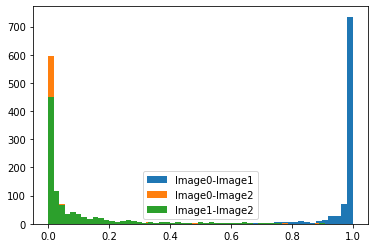

In [6]:
#plot distributions
fig,ax = plt.subplots(1)
ax.hist(sim_0_1,50,label='Image0-Image1')
ax.hist(sim_0_2,50,label='Image0-Image2')
ax.hist(sim_1_2,50,label='Image1-Image2')
ax.legend()
plt.show()

#image0 and image1 are from the same camera model, and have high forensic similarity
#image0 and image2 are from different camera models, and have low forensic similarity
#image1 and image2 are from different camera models, and have low forensic similarity